In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Canada.csv',index_col=0)
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(columns=['Type', 'Coverage', 'AREA', 'REG','DEV', 'DevName'],inplace=True)
df.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df.set_index('Country',inplace=True)

In [4]:
years = list(map(str,range(1980,2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [5]:
df['Total'] = df.sum(axis=1)
df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0


In [6]:
import matplotlib.patches as mp

In [7]:
mpl.style.use('grayscale')

### Waffle Charts

In [8]:
df2 = df.loc[['Denmark', 'Norway', 'Sweden'], :]
df2

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,272,293,299,106,93,73,93,109,...,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3901.0
Norway,Europe,Northern Europe,116,77,106,51,31,54,56,80,...,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2327.0
Sweden,Europe,Northern Europe,281,308,222,176,128,158,187,198,...,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5866.0


### Waffle chart

In [9]:
widith = 40
hight = 10

In [10]:
tlength = hight*widith
tlength

400

In [11]:
total_values = df2['Total'].sum()
category_proportions = df2['Total']/total_values
pd.DataFrame({
    'Category_Propartions':category_proportions})

,Category_Propartions
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [12]:
title_per_category = (category_proportions*total_values).round().astype(int)
pd.DataFrame({'Title per category':title_per_category})

,Title per category
Country,
Denmark,3901
Norway,2327
Sweden,5866


In [13]:
waffle_chart = np.zeros((hight,widith),dtype=np.uint)
category_index=0
title_index=0

for col in range(widith):
    
    for row in range(hight):
        title_index+=1
        if title_index>sum(title_per_category[0:category_index]):
            category_index+=1
        waffle_chart[row,col]= category_index
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

fig = plt.figure()
color_map = plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=color_map)
plt.show()

## Word Clouds

In [14]:
from wordcloud import WordCloud,STOPWORDS
import urllib

print('word cloud impoprted')

word cloud impoprted


In [15]:
stopwords = set(STOPWORDS)

##### Importing the text file.

In [16]:
# open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [17]:
alice_wc = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)
alice_wc.generate(alice_novel)

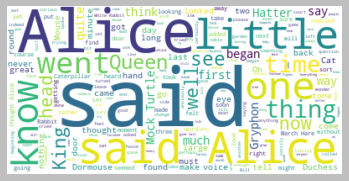

In [18]:
#display the image of word
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

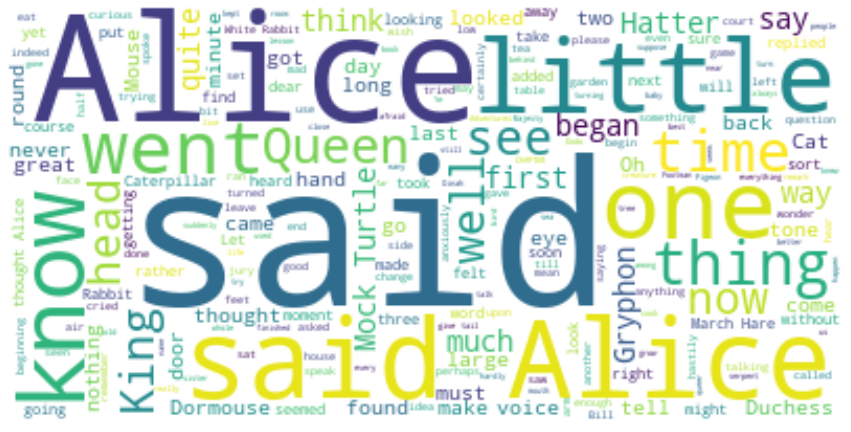

In [19]:
#imcreasing size of the image
mpl.style.use('ggplot')
plt.figure(figsize=(15,20))
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

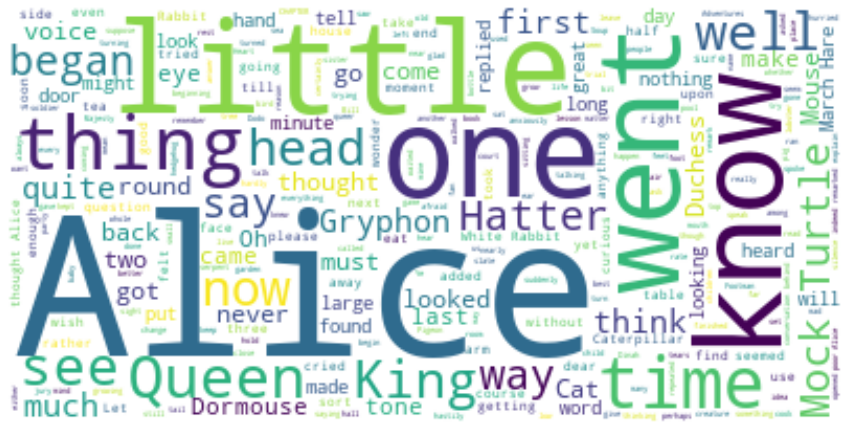

In [20]:
## Remove said stop word here ....

stopwords.add('said')
alice_wc.generate(alice_novel)

plt.figure(figsize=(15,20))
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### Masking

In [21]:
from PIL import Image

In [22]:
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

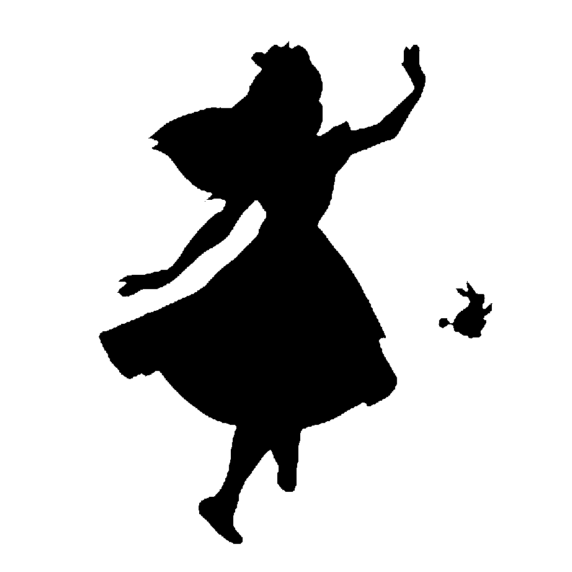

In [23]:
plt.figure(figsize=(10,15))

plt.imshow(alice_mask,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')
plt.show()

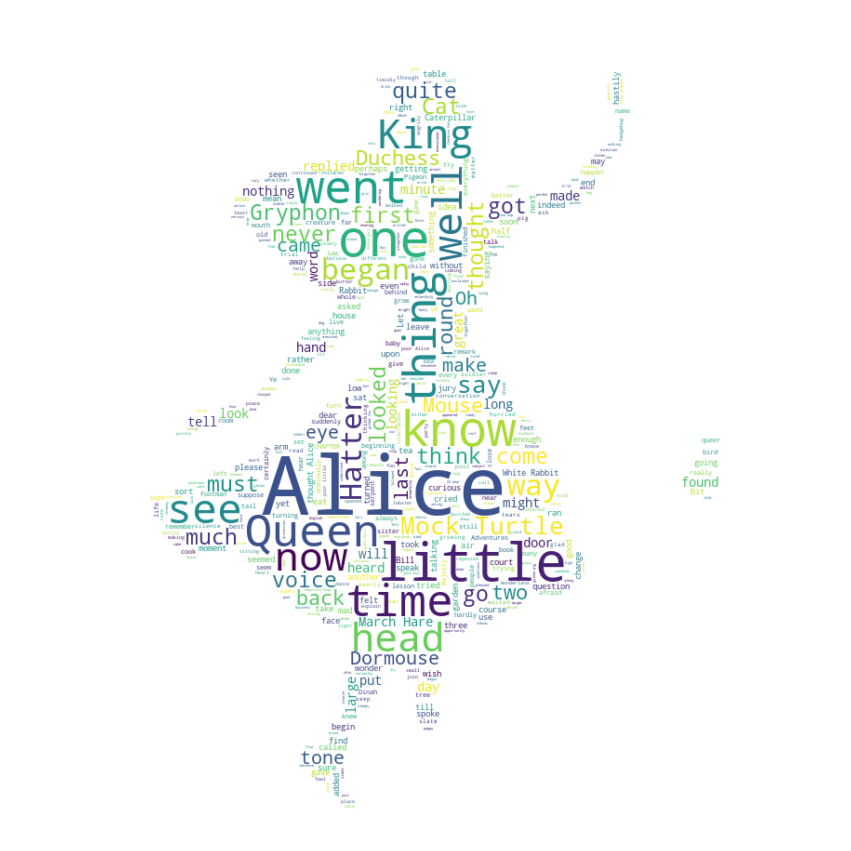

In [24]:
alice_wc = WordCloud(background_color='white',max_words=2000,mask=alice_mask,stopwords=stopwords)

plt.figure(figsize=(15,19))

alice_wc.generate(alice_novel)
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
df2 = df['Total'].sum()
df2

6409153.0

In [26]:
max_words = 90
word_string=' '
for country in df.index.values:
    if country.count(" ")==0:
        repeated_number_times = int(df.loc[country,'Total']/df2 * max_words)
        word_string = word_string + ((country + ' ') * repeated_number_times)
word_string

' China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

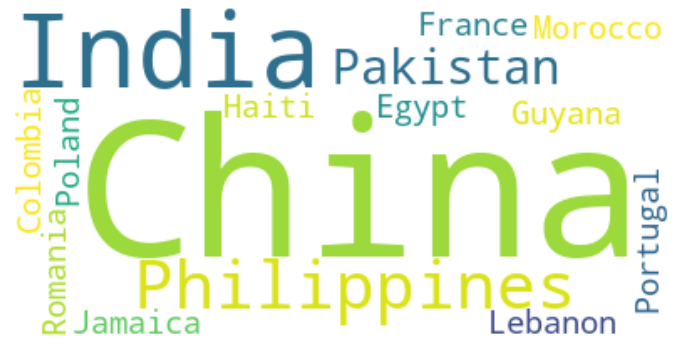

In [27]:
#creating word cloud for the country names for the data set..

df_wc = WordCloud(max_words=90,background_color='white',stopwords=stopwords)

df_wc.generate(word_string)

#plotting..
plt.figure(figsize=(12,15))
plt.imshow(df_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### Creating custom word cloud with spider man image

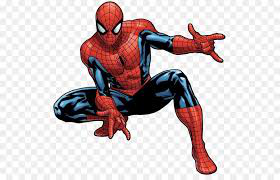

In [28]:
Image.open(urllib.request.urlopen('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwMRsY7rnaQlJuGUx6hyeuwe4-gMoUN0dk6g&usqp=CAU'))

In [29]:
mask_df = np.array(Image.open(urllib.request.urlopen('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwMRsY7rnaQlJuGUx6hyeuwe4-gMoUN0dk6g&usqp=CAU')))

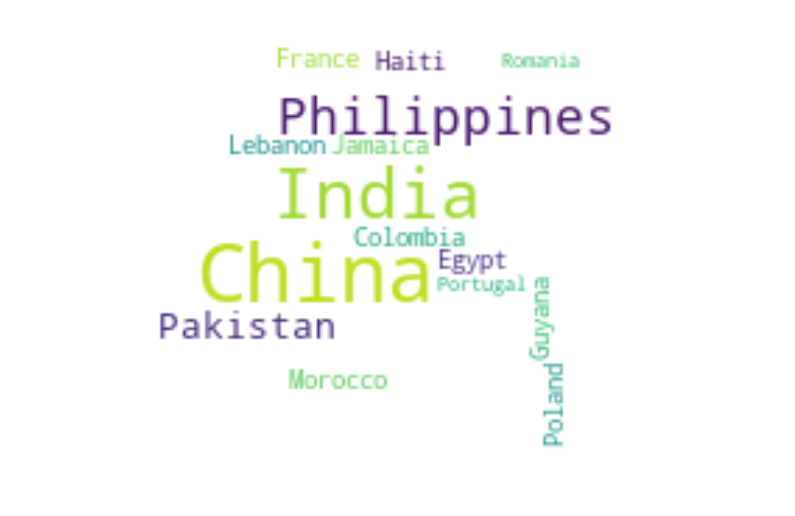

In [30]:
df_wc = WordCloud(background_color='white',mask=mask_df,max_words=90,stopwords=stopwords)

df_wc.generate(word_string)
plt.figure(figsize=(14,10))
plt.imshow(df_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### Regression Plots

In [31]:
import seaborn as sns
print('seaborn imported')
mpl.style.use('ggplot')

seaborn imported


In [32]:
df_tot = pd.DataFrame(df[years].sum(axis=0))
df_tot.index = map(float,df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['Year','Total']
df_tot.head()

,Year,Total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


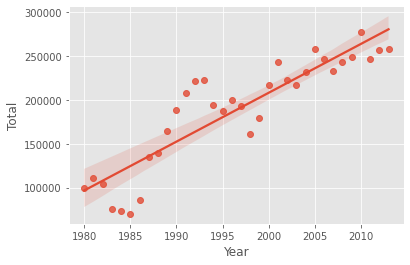

In [33]:
sns.regplot(x='Year',y='Total',data=df_tot)
plt.show()

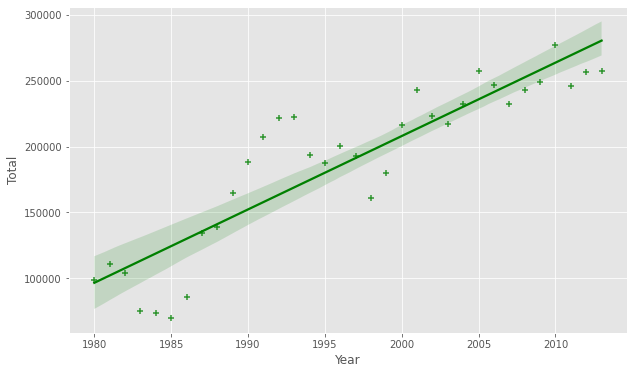

In [48]:
plt.figure(figsize=(10,6))
sns.regplot(x='Year',y='Total',data=df_tot,marker='+',color='green')
plt.show()

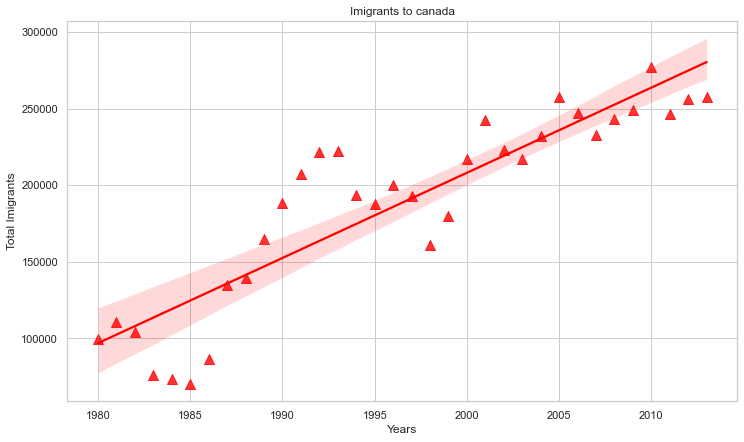

In [71]:
plt.figure(figsize=(12,7))
sns.set(font_scale=1)
sns.set_style('whitegrid')
sns.regplot(x='Year',y='Total',data=df_tot,marker='^',color='red',scatter_kws={'s':100}).set(title='Imigrants to canada',
                                                                                    xlabel='Years',ylabel='Total Imigrants')
plt.show()

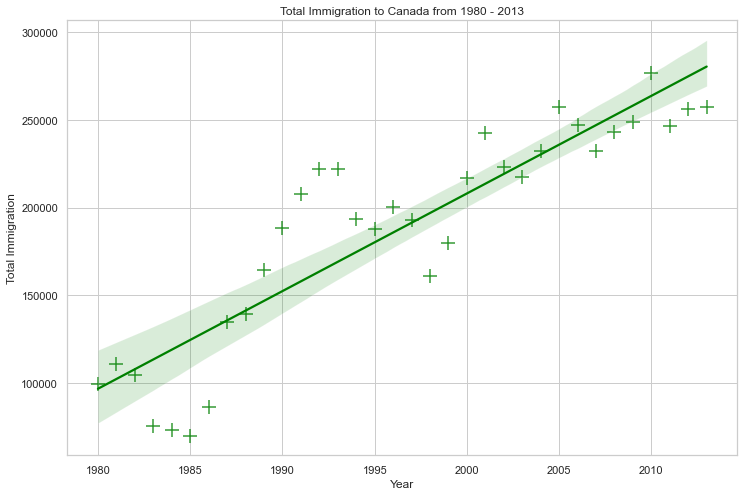

In [72]:
temp = pd.DataFrame(df.loc[:,years].transpose().sum(axis=1))
temp.index = map(float,temp.index)
temp.reset_index(inplace=True)
temp.columns = ['Year','Total Imigrants']

plt.figure(figsize=(12,8))
ax = sns.regplot(x='Year', y='Total Imigrants', data=temp, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()